<a href="https://colab.research.google.com/github/JackGallagher41/IDS/blob/main/Project5/Project_5_IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Jack Gallagher**

### **Project 5**

November 17, 2023

## **1. Use the following data set: https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csvLinks to an external site.**

In [ ]:
import pandas as pd

#used to import the database
alcoholDF  = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv")

#print the dataframe
alcoholDF

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


## **2. OBJECTIVE: You will use the data set to demonstrate how we can use Naïve Bayes to classify a response variable. Specifically, we want to predict whether a wine is red or white based on whether the wine has high or low alcohol and sugar content.**

## **3. Test for presence any missing attribute/target values and impute as necessary.**

In [ ]:
alcoholDF.isna().any()

Type            False
Alcohol_flag    False
Sugar_flag      False
dtype: bool

Using .isna() we are able to conclude that there are no missing values within the data set therefore causing no necessary imputations

## **4. Encode all categoric attributes (e.g. label encoding or ordinal encoding, etc.)**

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_alcoholDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes
for i in range(0, alcoholDF.shape[1]):
    if alcoholDF.dtypes[i]=='object' or alcoholDF.dtypes[i]=='bool':
        encoded_alcoholDF[alcoholDF.columns[i]] = le.fit_transform(alcoholDF[alcoholDF.columns[i]])



print("-=========================")
print(alcoholDF)
print("-=========================")
encoded_alcoholDF

-=========================
       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
-=========================


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1


Encoding the values takes all categoric and boolean values and gives them a numeric representation, ex: white is represented by 1 and red is represented by 0.

## **5. Create contingency tables (cross tabulations) for: a. Type vs. alcohol content b. Type vs. Sugar content**

In [ ]:
#Creates a contingency table between type and alcohol content
p_crosstab = pd.crosstab(encoded_alcoholDF.Type, encoded_alcoholDF.Alcohol_flag)

print(p_crosstab)

Alcohol_flag     0     1
Type                    
0              485   600
1             1176  1084


In [ ]:
#Creates a contingency table between type and sugar content
p2_crosstab = pd.crosstab(encoded_alcoholDF.Type, encoded_alcoholDF.Sugar_flag)

print(p2_crosstab)

Sugar_flag     0    1
Type                 
0            237  848
1           1382  878


Conclussions made: White tends to have a higher Alcohol flag as well as a higher sugar flag. Red tends to have a lower Alcohol flag and lower sugar flag. White has over double the representation of red in the data set.

## **6. Plot the two cross tabulations obtained in Step 5.**

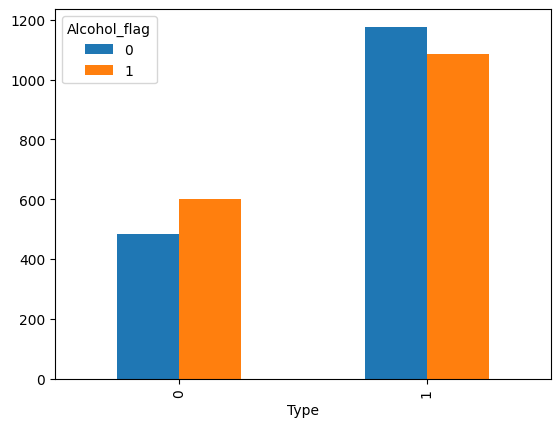

In [ ]:
barplot = p_crosstab.plot.bar(rot=90)

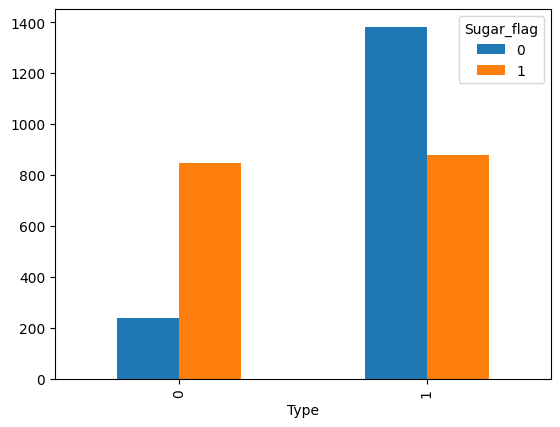

In [ ]:
barplot = p2_crosstab.plot.bar(rot=90)

After plotting the data we are able to get a better visual of the conclussion previously made. The graph provides an easier way of understanding and allows us to confirm our conclussion.

## **Use the tables from the previous step to calculate: a. The prior probability of Type = Red and Type = White. b. The probability of high and low alcohol content. c. The probability of high and low sugar content. d. The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red). e. The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red)**

In [ ]:
#Takes the total number red  and divides by total number
proportionRed=p_crosstab.loc[0].sum()/p_crosstab.sum().sum()

print ("The probability of red is: " , proportionRed)

#Takes the total number white  and divides by total number
proportionWhite=p_crosstab.loc[1].sum()/p_crosstab.sum().sum()

print ("The probability of white is: " , proportionWhite)

The probability of red is:  0.3243647234678625
The probability of white is:  0.6756352765321375


There is over double the chance that the type is white

In [ ]:
#Takes the total number high alcohol and divides by total number
proportionHighAlcohol=p_crosstab.sum().loc[0]/p_crosstab.sum().sum()

print ("The probability of high alcohol content is: " , proportionHighAlcohol)

#Takes the total number low alcohol  and divides by total number
proportionLowAlcohol=p_crosstab.sum().loc[1]/p_crosstab.sum().sum()

print ("The probability of low alcohol content is: " , proportionLowAlcohol)

The probability of high alcohol content is:  0.49656203288490286
The probability of low alcohol content is:  0.5034379671150971


It is almost a 50/50 split on whether the alcohol content is high or low

In [ ]:
#Takes the total number high sugar  and divides by total number
proportionHighSugar=p2_crosstab.sum().loc[0]/p2_crosstab.sum().sum()

print ("The probability of high sugar content is: " , proportionHighSugar)

proportionLowSugar=p2_crosstab.sum().loc[1]/p2_crosstab.sum().sum()
#Takes the total number low sugar  and divides by total number
print ("The probability of low sugar content is: " , proportionLowSugar)

The probability of high sugar content is:  0.48400597907324366
The probability of low sugar content is:  0.5159940209267564


Though a bigger difference in probability from alcohol content sugar high or low is near 50/50 as well

In [ ]:
#Takes the total number high alcohol  and divides by total number red
proportionHighAlcoholRed=p_crosstab.loc[0].loc[0]/p_crosstab.loc[0].sum()
print ("The probability of red having high alcohol content is: " , proportionHighAlcoholRed)
#Takes the total number low alcohol  and divides by total number red
proportionLowAlcoholRed=p_crosstab.loc[0].loc[1]/p_crosstab.loc[0].sum()
print ("The probability of red having low alcohol content is: " , proportionLowAlcoholRed)

The probability of red having high alcohol content is:  0.4470046082949309
The probability of red having low alcohol content is:  0.5529953917050692


Red is around 10-11% more likely to have low alcohol content



In [ ]:
#Takes the total number high sugar  and divides by total number red
proportionHighSugarRed=p2_crosstab.loc[0].loc[0]/p2_crosstab.loc[0].sum()
print ("The probability of red having high alcohol content is: " , proportionHighSugarRed)
#Takes the total number low sugar  and divides by total number red
proportionLowSugarRed=p2_crosstab.loc[0].loc[1]/p2_crosstab.loc[0].sum()
print ("The probability of red having low sugar content is: " , proportionLowSugarRed)

The probability of red having high alcohol content is:  0.2184331797235023
The probability of red having low sugar content is:  0.7815668202764977


Red has a high probability of low sugar content and is around 66-67% more likely

## **8. Create appropriate NB classifiers and record their accuracy on various training/test ratios, e.g., 80-20, 75-25, 70-30, 60-40, 50-50. Be sure to shuffle and stratify the data sets. & 9.Plot your findings.**

In [ ]:
# Generating various Naive Bayes models
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.model_selection import train_test_split

NBmodel = GaussianNB()

# Prepare input and output
X = encoded_alcoholDF.iloc[:,1:3]
y = encoded_alcoholDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=52, shuffle=True, test_size=.1, stratify=y)

# Display the sets
print(X_train)
print(X_test)


      Alcohol_flag  Sugar_flag
2297             1           0
858              1           0
3077             0           1
3069             0           0
2638             0           0
...            ...         ...
1088             1           1
587              1           0
1278             1           0
1268             1           0
1072             1           1

[3010 rows x 2 columns]
      Alcohol_flag  Sugar_flag
2854             0           1
1593             1           0
2173             1           0
1071             1           1
1042             1           1
...            ...         ...
2200             1           0
1784             1           0
2500             0           0
3020             0           0
483              0           1

[335 rows x 2 columns]


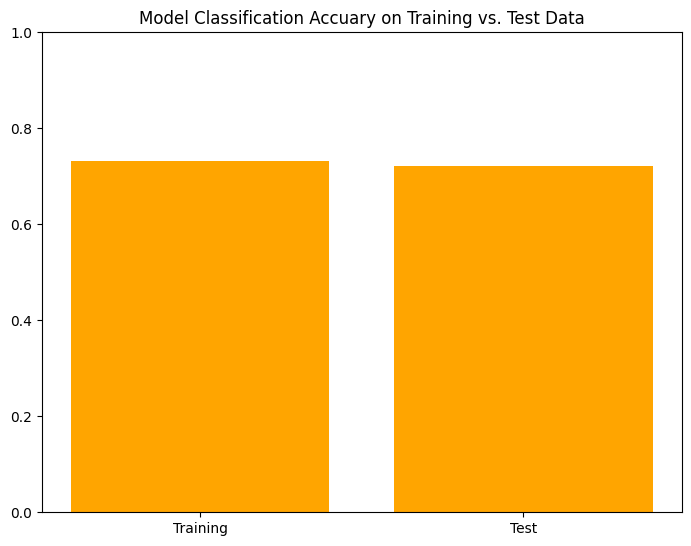

In [ ]:
import matplotlib.pyplot as plt

# Train the model
NBmodel.fit(X_train, y_train)

# Calculate model accuracy
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the model
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()


In [ ]:
# Prepare input and output for learning
X = encoded_alcoholDF.iloc[:,1:3]
y = encoded_alcoholDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=52, shuffle=True, test_size=.2, stratify=y)

# Display the sets
print(X_train)
print(X_test)


      Alcohol_flag  Sugar_flag
1446             0           0
980              1           0
2563             0           0
3009             0           1
1340             0           1
...            ...         ...
1088             1           1
2315             1           1
1278             1           0
1268             1           0
1072             1           1

[2676 rows x 2 columns]
      Alcohol_flag  Sugar_flag
1071             1           1
509              0           0
2261             1           1
253              1           1
3033             0           0
...            ...         ...
3157             0           0
34               0           1
3060             0           1
1811             1           0
593              1           0

[669 rows x 2 columns]


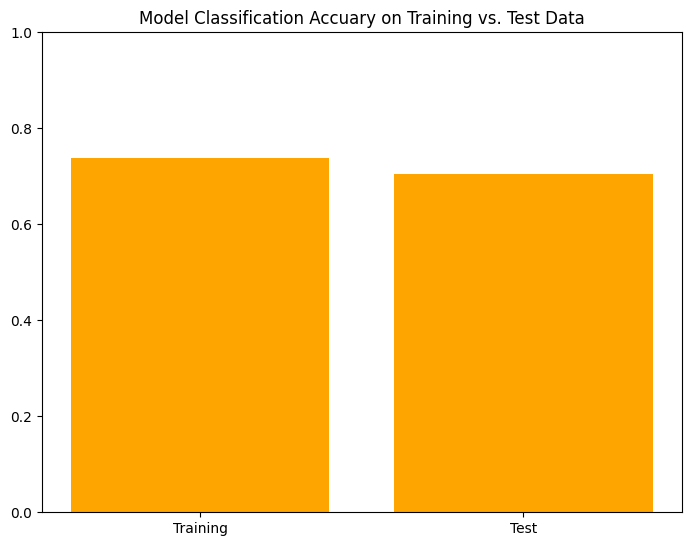

In [ ]:
# Train the model
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()


In [ ]:
# Prepare input and output for learning
X = encoded_alcoholDF.iloc[:,1:3]
y = encoded_alcoholDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=52, shuffle=True, test_size=.25, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
2270             1           0
472              1           1
1654             1           0
2142             1           1
2115             1           0
...            ...         ...
1088             1           1
1912             1           0
1278             1           0
1268             1           0
1072             1           1

[2508 rows x 2 columns]
      Alcohol_flag  Sugar_flag
2280             1           0
2265             1           1
2428             1           0
1495             0           1
3085             0           1
...            ...         ...
543              0           1
458              1           1
2668             0           0
773              1           0
888              1           0

[837 rows x 2 columns]


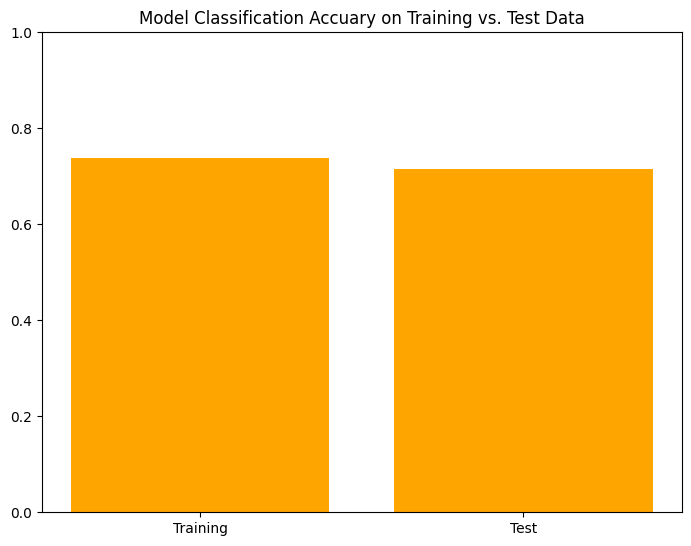

In [ ]:
# Train the model
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()


In [ ]:
# Prepare input and output for learning
X = encoded_alcoholDF.iloc[:,1:3]
y = encoded_alcoholDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=52, shuffle=True, test_size=.40, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
2748             0           0
1096             1           1
2853             0           1
1552             0           1
1150             1           1
...            ...         ...
1667             1           0
3295             0           0
2812             0           0
2696             0           1
1072             1           1

[2007 rows x 2 columns]
      Alcohol_flag  Sugar_flag
296              0           1
1881             1           0
1916             1           0
2578             0           0
581              0           0
...            ...         ...
1845             1           1
1233             1           1
2302             1           0
1456             0           1
2622             0           1

[1338 rows x 2 columns]


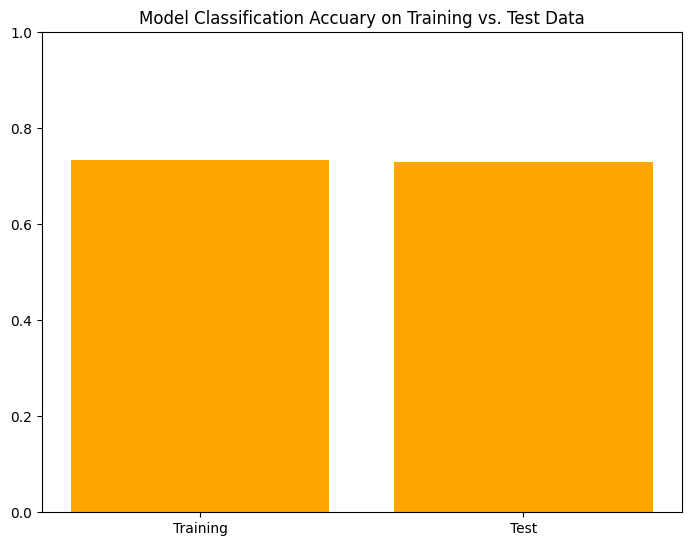

In [ ]:
# Train the model
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()


In [ ]:
# Prepare input and output for learning
X = encoded_alcoholDF.iloc[:,1:3]
y = encoded_alcoholDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=52, shuffle=True, test_size=.50, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
829              0           1
1096             1           1
3305             0           0
507              1           0
799              0           1
...            ...         ...
526              0           1
2522             0           0
1763             1           0
3147             0           0
1072             1           1

[1672 rows x 2 columns]
      Alcohol_flag  Sugar_flag
1592             1           0
498              0           1
2207             1           0
2989             0           0
1095             1           1
...            ...         ...
1461             0           0
800              0           1
336              0           0
2028             1           1
224              1           0

[1673 rows x 2 columns]


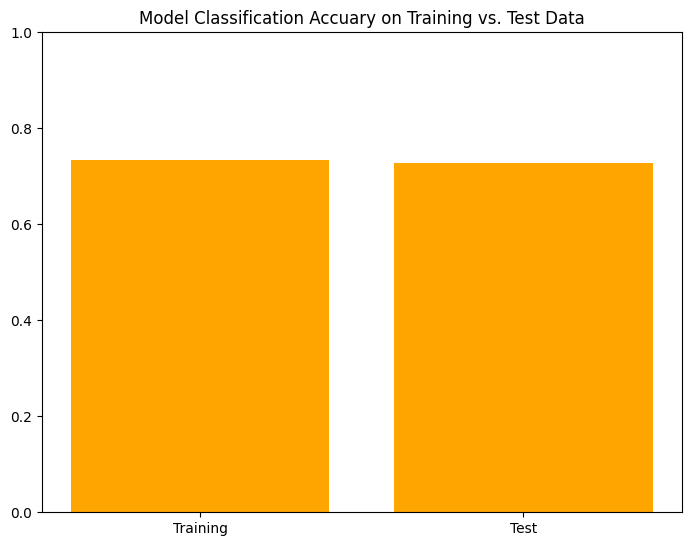

In [ ]:
# Train the model
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

The accuracy for both training sets when switching around the training and testing percentages remained around .7 for each test

### **10. Summarize:**



*   The accuracy for both training sets when switching around the training and testing percentages remained around .7 for each test

*   Red wine has a high probability of low sugar content and is around 66-67% more likely

*   Red wine is around 10-11% more likely to have low alcohol content

*   It is almost a 50/50 split on whether the alcohol content is high or low

*   Though a bigger difference in probability from alcohol content sugar high or low is near 50/50 as well
*   There is over double the chance that the wine type is white


*   White tends to have a higher Alcohol flag as well as a higher sugar flag.

*   Red tends to have a lower Alcohol flag and lower sugar flag.


*   White has over double the representation of red in the data set.


*  Encoding the values takes all categoric and boolean values and gives them a numeric representation, ex: white is represented by 1 and red is represented by 0.

*  Using .isna() we are able to conclude that there are no missing values within the data set therefore causing no necessary imputations




